<a href="https://colab.research.google.com/github/r9hit10/NetFlix-EDA/blob/main/Netflix_Exploratory_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##<font color="pink" style="sans-serif"> NETFLIX </font>
<font color="cornflowerblue" style="sans-serif">Netflix is one of the most popular media and video streaming platforms.
They have over 10000 movies or tv shows available on their platform, as of mid-2021, they have over 222M Subscribers globally.
This tabular dataset consists of listings of all the movies and tv shows available on Netflix, along with details such as - cast, directors, ratings, release year, duration, etc.</font>

## <font color="pink" style="sans-serif"> Business Problem Statement </font>
<font color="cornflowerblue" style="sans-serif">
Analyze the data for Netflix and generate insights that could help Netflix in deciding which type of shows/movies to produce and how they can grow the business in different countries

## <font color="pink" style="sans-serif"> Importing Python Libraries </font>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams
rcParams['figure.figsize']= 8,6


In [2]:
## Reading the Dataset

data=pd.read_csv("netflix.csv")

In [3]:
## Exploring the Dataset
## shape, number of rows and number of columns
## Default Data Types for the Columns

In [4]:
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [5]:
## Number of rows and columns
## data.shape

In [6]:
data.shape

(8807, 12)

In [7]:
## No. of Rows 8807
## No of Columns/Features 12

In [8]:
## Dataset Information
## data.info()

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


## <font color="pink" style="sans-serif"> Dataset Information </font>

The dataset provided consists of a list of all the TV shows/movies available on Netflix:

Show_id: Unique ID for every Movie / Tv Show

Type: Identifier - A Movie or TV Show

Title: Title of the Movie / Tv Show

Director: Director of the Movie

Cast: Actors involved in the movie/show

Country: Country where the movie/show was produced

Date_added: Date it was added on Netflix

Release_year: Actual Release year of the movie/show

Rating: TV Rating of the movie/show

Duration: Total Duration - in minutes or number of seasons

Listed_in: Genre

Description: The summary description


In [10]:
## Data types for columns
## df.dtypes

In [11]:
data.dtypes

,0
show_id,object
type,object
title,object
director,object
cast,object
country,object
date_added,object
release_year,int64
rating,object
duration,object


In [12]:
## Converting "type" column to 'category' data type for faster evaluation and comparisions

In [13]:
data["type"]=data["type"].astype("category")

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   show_id       8807 non-null   object  
 1   type          8807 non-null   category
 2   title         8807 non-null   object  
 3   director      6173 non-null   object  
 4   cast          7982 non-null   object  
 5   country       7976 non-null   object  
 6   date_added    8797 non-null   object  
 7   release_year  8807 non-null   int64   
 8   rating        8803 non-null   object  
 9   duration      8804 non-null   object  
 10  listed_in     8807 non-null   object  
 11  description   8807 non-null   object  
dtypes: category(1), int64(1), object(10)
memory usage: 765.7+ KB


In [15]:
## Movie/TV_Series Release_Years

In [16]:
data.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


<font color="cornflowerblue" style="sans-serif">
Using .describe() we can see that,

Release_year
Ranges from 1925(min) to
2021(max)

50% of Releases are in 2017

In [17]:
## checking for the missing values
## using .isnull()

In [18]:
data.isnull().sum()

,0
show_id,0
type,0
title,0
director,2634
cast,825
country,831
date_added,10
release_year,0
rating,4
duration,3


In [19]:
## Total Missing values in the Dataset

In [20]:
data.isnull().sum().sum()

4307

<font color="cornflowerblue" style="sans-serif">There are in total 4307 Missing Values in the Dataset

In [21]:
## Checking the Percentage of Movies and TV Series in the Dataset
## .value_counts(normalize=True)

In [22]:
data["type"].value_counts(normalize=True)

,proportion
type,
Movie,0.696151
TV Show,0.303849


In [23]:
## Approximately 70% of the data is for Movies
## Aproximately 30% of the data is for TV Series

<font color="cornflowerblue" style="sans-serif">Top 5 Countrywide Releases

In [24]:
data["country"].value_counts(normalize=True).head()

,proportion
country,
United States,0.353310
India,0.121866
United Kingdom,0.052533
Japan,0.030717
South Korea,0.024950


<font color="cornflowerblue" style="sans-serif">United States with 35% Movies and TV Series Release with 65% contribution from the rest of the World.

In [25]:
## Ratings Proportion

In [26]:
data["rating"].value_counts(normalize=True)[:5]

,proportion
rating,
TV-MA,0.364308
TV-14,0.245371
TV-PG,0.098035
R,0.090765
PG-13,0.055663


In [27]:
## Most common ratings "TV-MA"

In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   show_id       8807 non-null   object  
 1   type          8807 non-null   category
 2   title         8807 non-null   object  
 3   director      6173 non-null   object  
 4   cast          7982 non-null   object  
 5   country       7976 non-null   object  
 6   date_added    8797 non-null   object  
 7   release_year  8807 non-null   int64   
 8   rating        8803 non-null   object  
 9   duration      8804 non-null   object  
 10  listed_in     8807 non-null   object  
 11  description   8807 non-null   object  
dtypes: category(1), int64(1), object(10)
memory usage: 765.7+ KB


## <font color="pink" style="sans-serif"> Splitting data into Movies and TV Shows to Analyse Cast

In [29]:
Movies=data.loc[data["type"]=="Movie"]
TV_Shows=data.loc[data["type"]=="TV Show"]

In [30]:
Movies.shape

(6131, 12)

In [31]:
TV_Shows.shape

(2676, 12)

<font color="cornflowerblue" style="sans-serif">Total Movies = 6131
<font color="cornflowerblue" style="sans-serif">Total TV Shows = 2676

In [32]:
Movies.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic","September 23, 2021",2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...


In [33]:
Movies.drop(columns=["show_id","type","date_added","release_year","duration","description"])

,title,director,cast,country,rating,listed_in
0,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,PG-13,Documentaries
6,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,PG,Children & Family Movies
7,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...",TV-MA,"Dramas, Independent Movies, International Movies"
9,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,PG-13,"Comedies, Dramas"
12,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic",TV-MA,"Dramas, International Movies"
...,...,...,...,...,...,...
8801,Zinzana,Majid Al Ansari,"Ali Suliman, Saleh Bakri, Yasa, Ali Al-Jabri, ...","United Arab Emirates, Jordan",TV-MA,"Dramas, International Movies, Thrillers"
8802,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,R,"Cult Movies, Dramas, Thrillers"
8804,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,R,"Comedies, Horror Movies"
8805,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,PG,"Children & Family Movies, Comedies"


## <font color="cornflowerblue"> Most frequently casted actor(s/ess) in movies</font>

In [34]:
movie_cast=dict()

In [35]:
for i in Movies["cast"].dropna().values:
  for j in i.split(","):
    if j in movie_cast:
      movie_cast[str(j).strip()] +=1
    else:
      movie_cast[str(j).strip()] =1

In [36]:
movie_cast=sorted(movie_cast.items(), key= lambda x : x[1], reverse=True)

In [37]:
movie_cast[:5]

[('Adam Sandler', 20),
 ('Vatsal Dubey', 16),
 ('Ahmed Helmy', 13),
 ('Samuel West', 11),
 ('Eddie Murphy', 10)]

## <font color="pink"> Most frequent directors</font>

In [38]:
movie_directors=dict()
for i in Movies["director"].dropna().values:
  for j in i.split(","):
    if j in movie_directors:
      movie_directors[str(j).strip()] +=1
    else:
      movie_directors[str(j).strip()] =1

In [39]:
movie_directors = sorted(movie_directors.items(), key= lambda x : x[1] , reverse=True)

In [40]:
movie_directors[:5]

[('Rajiv Chilaka', 22),
 ('Suhas Kadav', 16),
 ('Jay Karas', 15),
 ('Marcus Raboy', 15),
 ('Cathy Garcia-Molina', 13)]

## <font color="pink"> Most frequent Movie Genres</font>

In [41]:
Movies["listed_in"]

,listed_in
0,Documentaries
6,Children & Family Movies
7,"Dramas, Independent Movies, International Movies"
9,"Comedies, Dramas"
12,"Dramas, International Movies"
...,...
8801,"Dramas, International Movies, Thrillers"
8802,"Cult Movies, Dramas, Thrillers"
8804,"Comedies, Horror Movies"
8805,"Children & Family Movies, Comedies"


In [42]:
movie_genre= dict()
for i in Movies["listed_in"].dropna().values:
  for j in i.split(","):
    if  j in movie_genre:
      movie_genre[str(j).strip()] +=1
    else:
      movie_genre[str(j).strip()] = 1

In [43]:
movie_genre

{'Documentaries': 19,
 'Children & Family Movies': 5,
 'Dramas': 2,
 'Independent Movies': 1,
 'International Movies': 1,
 'Comedies': 1,
 'Thrillers': 1,
 'Romantic Movies': 1,
 'Music & Musicals': 1,
 'Horror Movies': 1,
 'Sci-Fi & Fantasy': 1,
 'Action & Adventure': 859,
 'Classic Movies': 2,
 'Anime Features': 2,
 'Sports Movies': 1,
 'Cult Movies': 2,
 'Faith & Spirituality': 1,
 'LGBTQ Movies': 1,
 'Stand-Up Comedy': 26,
 'Movies': 57}

In [44]:
movie_genre = sorted(movie_genre.items(), key = lambda x:x[1], reverse= True)
movie_genre[:5]

[('Action & Adventure', 859),
 ('Movies', 57),
 ('Stand-Up Comedy', 26),
 ('Documentaries', 19),
 ('Children & Family Movies', 5)]

## <font color="pink"> High Number of Movies producing countries</font>

In [45]:
Movies["country"].value_counts().reset_index().head(10)

,country,count
0,United States,2058
1,India,893
2,United Kingdom,206
3,Canada,122
4,Spain,97
5,Egypt,92
6,Nigeria,86
7,Indonesia,77
8,Turkey,76
9,Japan,76


## <font color="pink"> **TV Shows**</font>

In [46]:
TV=data.loc[data["type"]=="TV Show"]
TV.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...


In [47]:
TV=TV.drop(columns=["show_id","type","date_added","release_year","duration","description"])
TV.head()

,title,director,cast,country,rating,listed_in
1,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,TV-MA,"International TV Shows, TV Dramas, TV Mysteries"
2,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,TV-MA,"Crime TV Shows, International TV Shows, TV Act..."
3,Jailbirds New Orleans,NaN,NaN,NaN,TV-MA,"Docuseries, Reality TV"
4,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,TV-MA,"International TV Shows, Romantic TV Shows, TV ..."
5,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",NaN,TV-MA,"TV Dramas, TV Horror, TV Mysteries"


## <font color="cornflowerblue"> Most frequently casted actor(s/ess) in TV Shows</font>

In [48]:
tv_cast=dict()
for i in TV["cast"].dropna().values:
  for j in i.split(","):
    if j in tv_cast:
      tv_cast[str(j).strip()] +=1
    else:
      tv_cast[str(j).strip()] = 1

In [49]:
tv_cast=sorted(tv_cast.items(), key= lambda x: x[1], reverse= True)
tv_cast[:5]

[('David Attenborough', 14),
 ('Michela Luci', 7),
 ('Tara Strong', 4),
 ('You', 4),
 ('Natsuki Hanae', 4)]

## <font color="cornflowerblue"> Most TV Shows Producing Directors </font>

In [50]:
tv_director=dict()
for i in TV["director"].dropna().values:
  for j in i.split(","):
    if j in tv_director:
      tv_director[str(j).strip()] += 1
    else:
      tv_director[str(j).strip()] = 1

In [51]:
tv_director= sorted(tv_director.items(), key = lambda x: x[1], reverse= True)
tv_director[:5]

[('Alastair Fothergill', 3),
 ('Ken Burns', 3),
 ('Hsu Fu-chun', 2),
 ('Rob Seidenglanz', 2),
 ('Joe Berlinger', 2)]

## <font color="cornflowerblue"> Most Frequent TV Show Genres </font>

In [52]:
tv_genre=dict()
for i in TV["listed_in"].dropna().values:
  for j in i.split(","):
    if j in tv_genre:
      tv_genre[str(j).strip()] +=1
    else:
      tv_genre[str(j).strip()] =1

In [53]:
tv_genre = sorted(tv_genre.items(), key= lambda x: x[1], reverse= True)
tv_genre[:5]

[('British TV Shows', 253),
 ('Anime Series', 176),
 ('TV Shows', 16),
 ('International TV Shows', 8),
 ("Kids' TV", 3)]

## <font color="cornflowerblue"> Most Frequent Country for TV Shows </font>

In [54]:
TV["country"].value_counts().reset_index().head()

,country,count
0,United States,760
1,United Kingdom,213
2,Japan,169
3,South Korea,158
4,India,79


## <font color="cornflowerblue"> General Observations </font>

## <font color="cornflowerblue"> Most releases </font>

In [55]:
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [56]:
data["release_year"].value_counts()

,count
release_year,
2018,1147
2017,1032
2019,1030
2020,953
2016,902
...,...
1959,1
1925,1
1961,1


In [57]:
## Most number of movies and TV Shows are released in 2018, 2017 and followed by 2019 and so

In [58]:
data["date_added"].value_counts()

,count
date_added,
"January 1, 2020",109
"November 1, 2019",89
"March 1, 2018",75
"December 31, 2019",74
"October 1, 2018",71
...,...
"December 4, 2016",1
"November 21, 2016",1
"November 19, 2016",1


In [59]:
## Most number of Movies and Shows that were actually added on Netflix was on
## January 1, 2020 , November 1, 2019 , March 1, 2018,  December 31, 2019

# **Observations:**


<font color="cornflowerblue">From the release_year analysis, it looks like most of the content was released on 2018, followed by 2017.</font>

<font color="cornflowerblue">But, from the date_added, most of them were uploaded on 2020. So, that means on average, there was a gap of 2 years between release year and date_added.</font>

<font color="cornflowerblue">One reason could be COVID-19, when most of the users were watching from their home rather than going to theatres. </font>
<font color="cornflowerblue">So, Netflix might have added more content in 2020.</font>

In [60]:
data_duration=data["duration"].str.split(" ",expand=True)

In [61]:
data_duration.head(3)

,0,1
0,90,min
1,2,Seasons
2,1,Season


In [62]:
data_duration.rename(columns={0:"Duration_Season", 1:"Minute_Season"},inplace=True)

In [63]:
data_duration.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Duration_Season  8804 non-null   object
 1   Minute_Season    8804 non-null   object
dtypes: object(2)
memory usage: 137.7+ KB


In [64]:
data_duration["Duration_Season"]=data_duration["Duration_Season"].dropna().astype("int")

In [65]:
data_duration["Minute_Season"]=data_duration["Minute_Season"].dropna().astype("str")

In [66]:
data_duration.head()

,Duration_Season,Minute_Season
0,90.0,min
1,2.0,Seasons
2,1.0,Season
3,1.0,Season
4,2.0,Seasons


In [67]:
data_duration["Minute_Season"].value_counts()

,count
Minute_Season,
min,6128
Season,1793
Seasons,883


It can be assumed that as a show gets liked or becomes famous

It releases more seasons

Assuming that on average an episode of TV show runs for 50 mins

and Each Season has average 10 Episodes

In [68]:
def to_minute(df):
  if df["Minute_Season"]=="min":
    df["Minute_Season"]=int(1)
  elif (df["Minute_Season"]=="Season") | (df["Minute_Season"]=="Seasons"):
    df["Minute_Season"]=int(50*10)
  return df

In [69]:
data_duration=data_duration.apply(to_minute,axis=1)

In [70]:
data_duration.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Duration_Season  8804 non-null   float64
 1   Minute_Season    8804 non-null   float64
dtypes: float64(2)
memory usage: 137.7 KB


In [71]:
data.drop(columns="duration",inplace=True)

In [72]:
data["duration"]=(data_duration["Duration_Season"])*(data_duration["Minute_Season"])

In [73]:
movies=data.loc[data["type"]=="Movie"]

In [74]:
tvs=data.loc[data["type"]=="TV Show"]
tvs.drop(columns=["cast","director","country","rating","listed_in","description","date_added","release_year","show_id"],inplace=True)

<ipython-input-74-6491aa68a238>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tvs.drop(columns=["cast","director","country","rating","listed_in","description","date_added","release_year","show_id"],inplace=True)


## <font color="cornflowerblue"> Famous TV Shows Based on Number of Minutes </font>

In [75]:
## It can be assumed that as a show gets liked or becomes famous
## It releases more seasons
## Assuming that on average an episode if TV show runs for 50 mins
## and Each Season has average 10 Episodes

In [76]:
tvs.sort_values(by="duration",ascending=False).head(10).reset_index(drop=True)

,type,title,duration
0,TV Show,Grey's Anatomy,8500.0
1,TV Show,Supernatural,7500.0
2,TV Show,NCIS,7500.0
3,TV Show,Heartland,6500.0
4,TV Show,COMEDIANS of the world,6500.0
5,TV Show,Red vs. Blue,6500.0
6,TV Show,Trailer Park Boys,6000.0
7,TV Show,Criminal Minds,6000.0
8,TV Show,Frasier,5500.0
9,TV Show,Cheers,5500.0


In [77]:
data.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,listed_in,description,duration
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,Documentaries,"As her father nears the end of his life, filmm...",90.0
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",1000.0


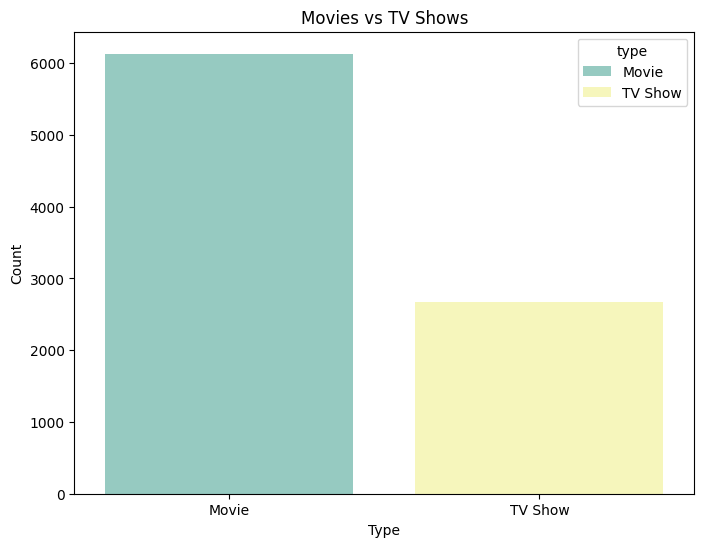

In [78]:
sns.countplot(data=data, x="type",hue="type", palette="Set3",legend =True)
plt.xlabel("Type")
plt.ylabel("Count")
plt.title("Movies vs TV Shows")
plt.show()

<font color="cornflowerblue"> 6000 Movies,   
                            2500 TV Shows </font>

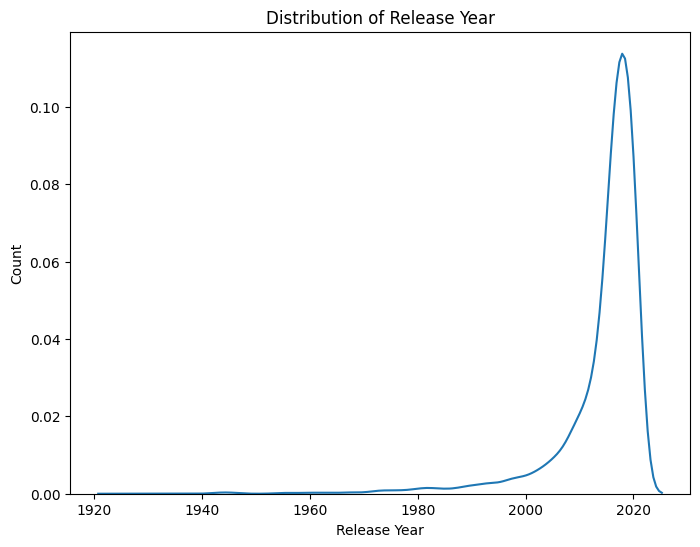

In [79]:
sns.kdeplot(data=data, x="release_year",legend =False)
plt.xlabel("Release Year")
plt.ylabel("Count")
plt.title("Distribution of Release Year")
plt.show()

<font color="cornflowerblue"> 1980s was start of regular releases of  Movies with 2016 onwards releases grew drastically </font>

In [80]:
dates=data[["date_added"]].dropna()

In [81]:
dates.tail(3)

,date_added
8804,"November 1, 2019"
8805,"January 11, 2020"
8806,"March 2, 2019"


In [82]:
dates["Month"]=dates["date_added"].apply(lambda x : x.strip().split(",")[0].split()[0])
dates["Year"] = dates["date_added"].apply(lambda x : x.strip().split(",")[1])
dates.tail(3)

,date_added,Month,Year
8804,"November 1, 2019",November,2019
8805,"January 11, 2020",January,2020
8806,"March 2, 2019",March,2019


In [83]:
dates.drop(columns="date_added",inplace=True)
dates.head(2)

,Month,Year
0,September,2021
1,September,2021


In [84]:
month_order=["January","February","March","April","May","June","July","August","September","October","November","December"]


In [85]:
year_month=dates.groupby("Year")["Month"].value_counts().unstack().fillna(0)[month_order].T.astype("int")
year_month

Year,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
Month,,,,,,,,,,,,,,
January,1,0,0,0,0,0,2,1,43,72,129,153,205,132
February,1,0,0,0,1,0,2,4,15,82,87,148,114,109
March,0,0,0,0,0,1,0,5,17,125,173,172,137,112
April,0,0,0,0,0,0,2,5,22,93,115,162,177,188
May,0,1,0,1,0,0,0,6,13,86,97,139,157,132
June,0,0,0,0,0,0,1,6,18,94,78,168,156,207
July,0,0,0,0,0,0,1,7,28,79,152,157,146,257
August,0,0,0,0,0,1,1,2,34,115,164,131,129,178
September,0,0,0,1,0,2,1,7,48,113,124,123,168,183


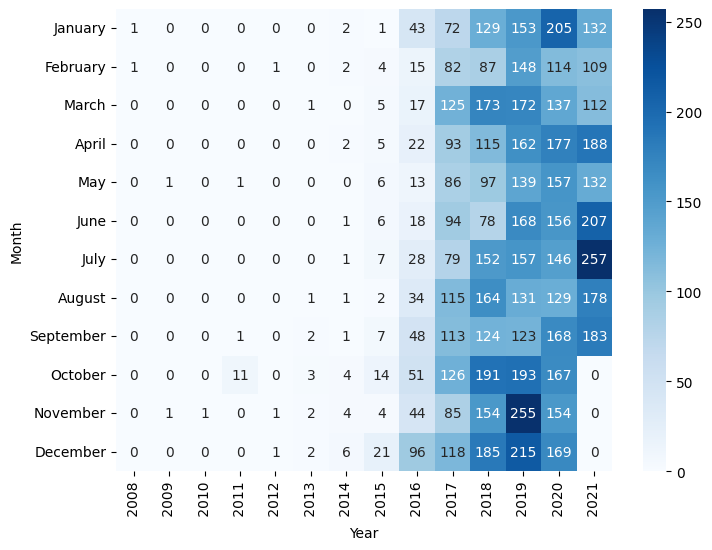

In [86]:
sns.heatmap(year_month,annot=True, fmt="d",cmap="Blues")
plt.xlabel("Year")
plt.ylabel("Month")
plt.show()

<font color="cornflowerblue">In 2018, 2019 & 2020, Netflix has uploaded maximum content during winters. Whereas in Q3, 2021, Netflix uploaded most of the content.
From 2008 - 2016, very few of the content was release on Netflix.  </font>

In [88]:
TV["rating"].value_counts()

,count
rating,
TV-MA,1145
TV-14,733
TV-PG,323
TV-Y7,195
TV-Y,176
TV-G,94
NR,5
R,2
TV-Y7-FV,1


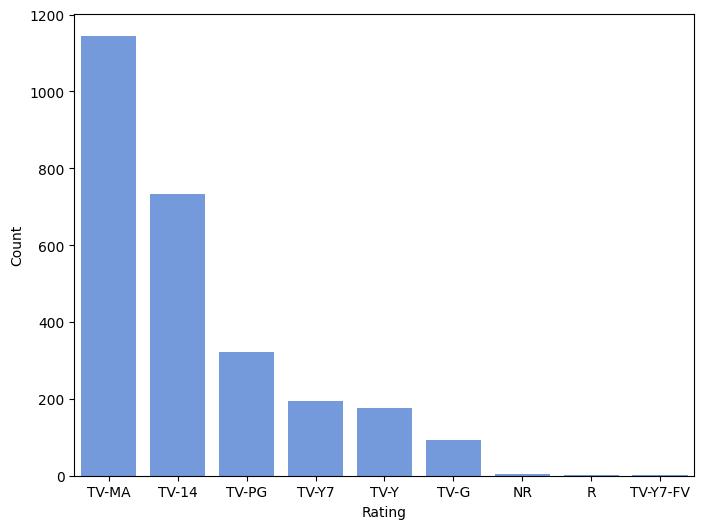

In [92]:
sns.countplot(data=TV,x="rating",order=TV["rating"].value_counts().index[:10],color="cornflowerblue")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()

<font color ="pink"> IN TV Shows most shows are released under "TV-MA" ratings followed by "TV-14"
TV-MA stands for "Mature Audience Only" and is a rating for television shows that are intended for adults and may be unsuitable for children under 17.</font>

<font color ="pink">A TV-14 rating means that a television program is not suitable for children under the age of 14. It's a rating that advises parents to strongly caution their children about the program. </font>

<font color ="pink">It can be inferred that the focussed audience is more in the adult category

</font>